In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
from sklearn.model_selection import train_test_split    
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import dlib



In [2]:
import os
csv_path = os.getenv("HOME") +"/aiffel/project/hospital.csv"
original_data = pd.read_csv(csv_path,encoding = 'euc-kr')

hospital = original_data.copy()
print(hospital.shape)
hospital.head()

(29, 15)


,행정구역별,의료기관별,항목,단위,Unnamed: 4,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,총계,주민등록인구수(등록외국인포함),NaN,명,NaN,50071811.0,50515666.00,51198415.50,51881165.00,52127443.0,52419359.00,52678429.00,52864414.00,52955620.00,53072685.00
1,총계,병원수,합계,개,NaN,56326.0,57135.00,58211.50,59288.00,60693.0,62179.00,63471.00,65056.00,66316.00,67100.00
2,총계,병상수,NaN,개,NaN,499656.0,527162.00,559737.00,592312.00,624546.0,651499.00,670096.00,690474.00,718145.00,696958.00
3,총계,병상확보율,NaN,%,NaN,1.0,1.04,1.09,1.14,1.2,1.24,1.27,1.31,1.35,1.31
4,총계,병원수,종합병원,개,NaN,314.0,316.00,319.00,322.00,323.0,330.00,338.00,341.00,343.00,353.00


In [3]:
print('전체 데이터 건수:', len(hospital))
print(len(hospital))

print(hospital.shape)


전체 데이터 건수: 29
29
(29, 15)


In [4]:
print('컬럼별 결측치 개수')
len(hospital) - hospital.count()

컬럼별 결측치 개수


행정구역별          0
의료기관별          0
항목            14
단위             0
Unnamed: 4    29
2009 년         0
2010 년         0
2011 년         0
2012 년         0
2013 년         0
2014 년         0
2015 년         0
2016 년         0
2017 년         0
2018 년         0
dtype: int64

In [5]:
hospital.isnull()


,행정구역별,의료기관별,항목,단위,Unnamed: 4,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [6]:
hospital[hospital.isnull().any(axis=1)]

,행정구역별,의료기관별,항목,단위,Unnamed: 4,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,총계,주민등록인구수(등록외국인포함),NaN,명,NaN,50071811.00,50515666.00,51198415.50,51881165.00,52127443.00,52419359.00,52678429.00,52864414.00,52955620.00,53072685.00
1,총계,병원수,합계,개,NaN,56326.00,57135.00,58211.50,59288.00,60693.00,62179.00,63471.00,65056.00,66316.00,67100.00
2,총계,병상수,NaN,개,NaN,499656.00,527162.00,559737.00,592312.00,624546.00,651499.00,670096.00,690474.00,718145.00,696958.00
3,총계,병상확보율,NaN,%,NaN,1.00,1.04,1.09,1.14,1.20,1.24,1.27,1.31,1.35,1.31
4,총계,병원수,종합병원,개,NaN,314.00,316.00,319.00,322.00,323.00,330.00,338.00,341.00,343.00,353.00
5,총계,병상수,NaN,개,NaN,131284.00,133623.00,136049.00,138475.00,140052.00,144598.00,147520.00,148500.00,149282.00,151547.00
6,총계,만명당종합병원수,NaN,개,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.07
7,총계,병원수,병원,개,NaN,1164.00,1183.00,1228.50,1274.00,1307.00,1332.00,1370.00,1370.00,1467.00,1406.00
8,총계,병상수,NaN,개,NaN,132211.00,135671.00,142761.50,149852.00,148747.00,148906.00,151353.00,148120.00,171762.00,150928.00
9,총계,병원수,의원,개,NaN,27065.00,27613.00,28059.50,28506.00,28341.00,29088.00,29385.00,30532.00,30832.00,31687.00


In [7]:
hospital.notnull()

,행정구역별,의료기관별,항목,단위,Unnamed: 4,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
2,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
3,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
5,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
6,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
8,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True


In [8]:
hospital.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [9]:
hospital.drop(['Unnamed: 4'], axis=1, inplace=True) 
hospital.head()

,행정구역별,의료기관별,항목,단위,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,총계,주민등록인구수(등록외국인포함),NaN,명,50071811.0,50515666.00,51198415.50,51881165.00,52127443.0,52419359.00,52678429.00,52864414.00,52955620.00,53072685.00
1,총계,병원수,합계,개,56326.0,57135.00,58211.50,59288.00,60693.0,62179.00,63471.00,65056.00,66316.00,67100.00
2,총계,병상수,NaN,개,499656.0,527162.00,559737.00,592312.00,624546.0,651499.00,670096.00,690474.00,718145.00,696958.00
3,총계,병상확보율,NaN,%,1.0,1.04,1.09,1.14,1.2,1.24,1.27,1.31,1.35,1.31
4,총계,병원수,종합병원,개,314.0,316.00,319.00,322.00,323.0,330.00,338.00,341.00,343.00,353.00


In [10]:
hospital.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [11]:
hospital.head()

,행정구역별,의료기관별,항목,단위,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,총계,주민등록인구수(등록외국인포함),NaN,명,50071811.0,50515666.00,51198415.50,51881165.00,52127443.0,52419359.00,52678429.00,52864414.00,52955620.00,53072685.00
1,총계,병원수,합계,개,56326.0,57135.00,58211.50,59288.00,60693.0,62179.00,63471.00,65056.00,66316.00,67100.00
2,총계,병상수,NaN,개,499656.0,527162.00,559737.00,592312.00,624546.0,651499.00,670096.00,690474.00,718145.00,696958.00
3,총계,병상확보율,NaN,%,1.0,1.04,1.09,1.14,1.2,1.24,1.27,1.31,1.35,1.31
4,총계,병원수,종합병원,개,314.0,316.00,319.00,322.00,323.0,330.00,338.00,341.00,343.00,353.00


In [12]:
from datetime import datetime
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline



import numpy as np

df = pd.DataFrame(hospital)
df.head()


,행정구역별,의료기관별,항목,단위,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
0,총계,주민등록인구수(등록외국인포함),NaN,명,50071811.0,50515666.00,51198415.50,51881165.00,52127443.0,52419359.00,52678429.00,52864414.00,52955620.00,53072685.00
1,총계,병원수,합계,개,56326.0,57135.00,58211.50,59288.00,60693.0,62179.00,63471.00,65056.00,66316.00,67100.00
2,총계,병상수,NaN,개,499656.0,527162.00,559737.00,592312.00,624546.0,651499.00,670096.00,690474.00,718145.00,696958.00
3,총계,병상확보율,NaN,%,1.0,1.04,1.09,1.14,1.2,1.24,1.27,1.31,1.35,1.31
4,총계,병원수,종합병원,개,314.0,316.00,319.00,322.00,323.0,330.00,338.00,341.00,343.00,353.00


In [13]:
df.shape

(29, 14)

In [14]:
df.describe()

,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.765077e+06,1.782336e+06,1.808190e+06,1.834045e+06,1.844876e+06,1.856889e+06,1.867208e+06,1.875123e+06,1.880263e+06,1.882906e+06
std,9.291209e+06,9.373306e+06,9.499710e+06,9.626118e+06,9.671476e+06,9.725378e+06,9.773267e+06,9.807571e+06,9.824207e+06,9.846159e+06
min,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,7.000000e-02
25%,2.370000e+02,1.820000e+02,1.820000e+02,1.910000e+02,2.220000e+02,2.190000e+02,2.370000e+02,2.150000e+02,2.380000e+02,2.370000e+02
50%,1.164000e+03,1.315000e+03,1.228500e+03,1.274000e+03,1.335000e+03,1.332000e+03,1.370000e+03,1.374000e+03,1.467000e+03,1.452000e+03
75%,4.462200e+04,4.565800e+04,4.538650e+04,4.511500e+04,5.089900e+04,4.806000e+04,4.842700e+04,5.125000e+04,4.368700e+04,4.047800e+04
max,5.007181e+07,5.051567e+07,5.119842e+07,5.188116e+07,5.212744e+07,5.241936e+07,5.267843e+07,5.286441e+07,5.295562e+07,5.307268e+07


In [15]:
print(len(hospital.columns))
hospital.columns

14


Index(['행정구역별', '의료기관별', '항목', '단위', '2009 년', '2010 년', '2011 년', '2012 년',
       '2013 년', '2014 년', '2015 년', '2016 년', '2017 년', '2018 년'],
      dtype='object')

In [16]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   29 non-null     object 
 1   의료기관별   29 non-null     object 
 2   항목      15 non-null     object 
 3   단위      29 non-null     object 
 4   2009 년  29 non-null     float64
 5   2010 년  29 non-null     float64
 6   2011 년  29 non-null     float64
 7   2012 년  29 non-null     float64
 8   2013 년  29 non-null     float64
 9   2014 년  29 non-null     float64
 10  2015 년  29 non-null     float64
 11  2016 년  29 non-null     float64
 12  2017 년  29 non-null     float64
 13  2018 년  29 non-null     float64
dtypes: float64(10), object(4)
memory usage: 3.4+ KB


In [18]:
print(df)

   행정구역별             의료기관별        항목 단위       2009 년       2010 년  \
0     총계  주민등록인구수(등록외국인포함)       NaN  명  50071811.00  50515666.00   
1     총계               병원수       합계   개     56326.00     57135.00   
2     총계               병상수       NaN  개    499656.00    527162.00   
3     총계             병상확보율       NaN  %         1.00         1.04   
4     총계               병원수      종합병원  개       314.00       316.00   
5     총계               병상수       NaN  개    131284.00    133623.00   
6     총계          만명당종합병원수       NaN  개         0.06         0.06   
7     총계               병원수        병원  개      1164.00      1183.00   
8     총계               병상수       NaN  개    132211.00    135671.00   
9     총계               병원수       의원   개     27065.00     27613.00   
10    총계               병상수       NaN  개     92020.00     89489.00   
11    총계               병원수      특수병원  개       668.00       149.00   
12    총계               병상수       NaN  개     44622.00     45658.00   
13    총계               병원수      요양

   행정구역별             의료기관별        항목 단위       2009 년       2010 년  \
0     총계  주민등록인구수(등록외국인포함)       NaN  명  50071811.00  50515666.00   
1     총계               병원수       합계   개     56326.00     57135.00   
2     총계               병상수       NaN  개    499656.00    527162.00   
3     총계             병상확보율       NaN  %         1.00         1.04   
4     총계               병원수      종합병원  개       314.00       316.00   
5     총계               병상수       NaN  개    131284.00    133623.00   
6     총계          만명당종합병원수       NaN  개         0.06         0.06   
7     총계               병원수        병원  개      1164.00      1183.00   
8     총계               병상수       NaN  개    132211.00    135671.00   
9     총계               병원수       의원   개     27065.00     27613.00   
10    총계               병상수       NaN  개     92020.00     89489.00   
11    총계               병원수      특수병원  개       668.00       149.00   
12    총계               병상수       NaN  개     44622.00     45658.00   
13    총계               병원수      요양

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, '2018 년'),
  Text(0.0, 0, '2010 년'),
  Text(1.0, 0, '2011 년'),
  Text(2.0, 0, '2012 년'),
  Text(3.0, 0, '2013 년'),
  Text(4.0, 0, '2014 년'),
  Text(5.0, 0, '2015 년'),
  Text(6.0, 0, '2016 년'),
  Text(7.0, 0, '2017 년'),
  Text(8.0, 0, '2018 년'),
  Text(9.0, 0, '')])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backen

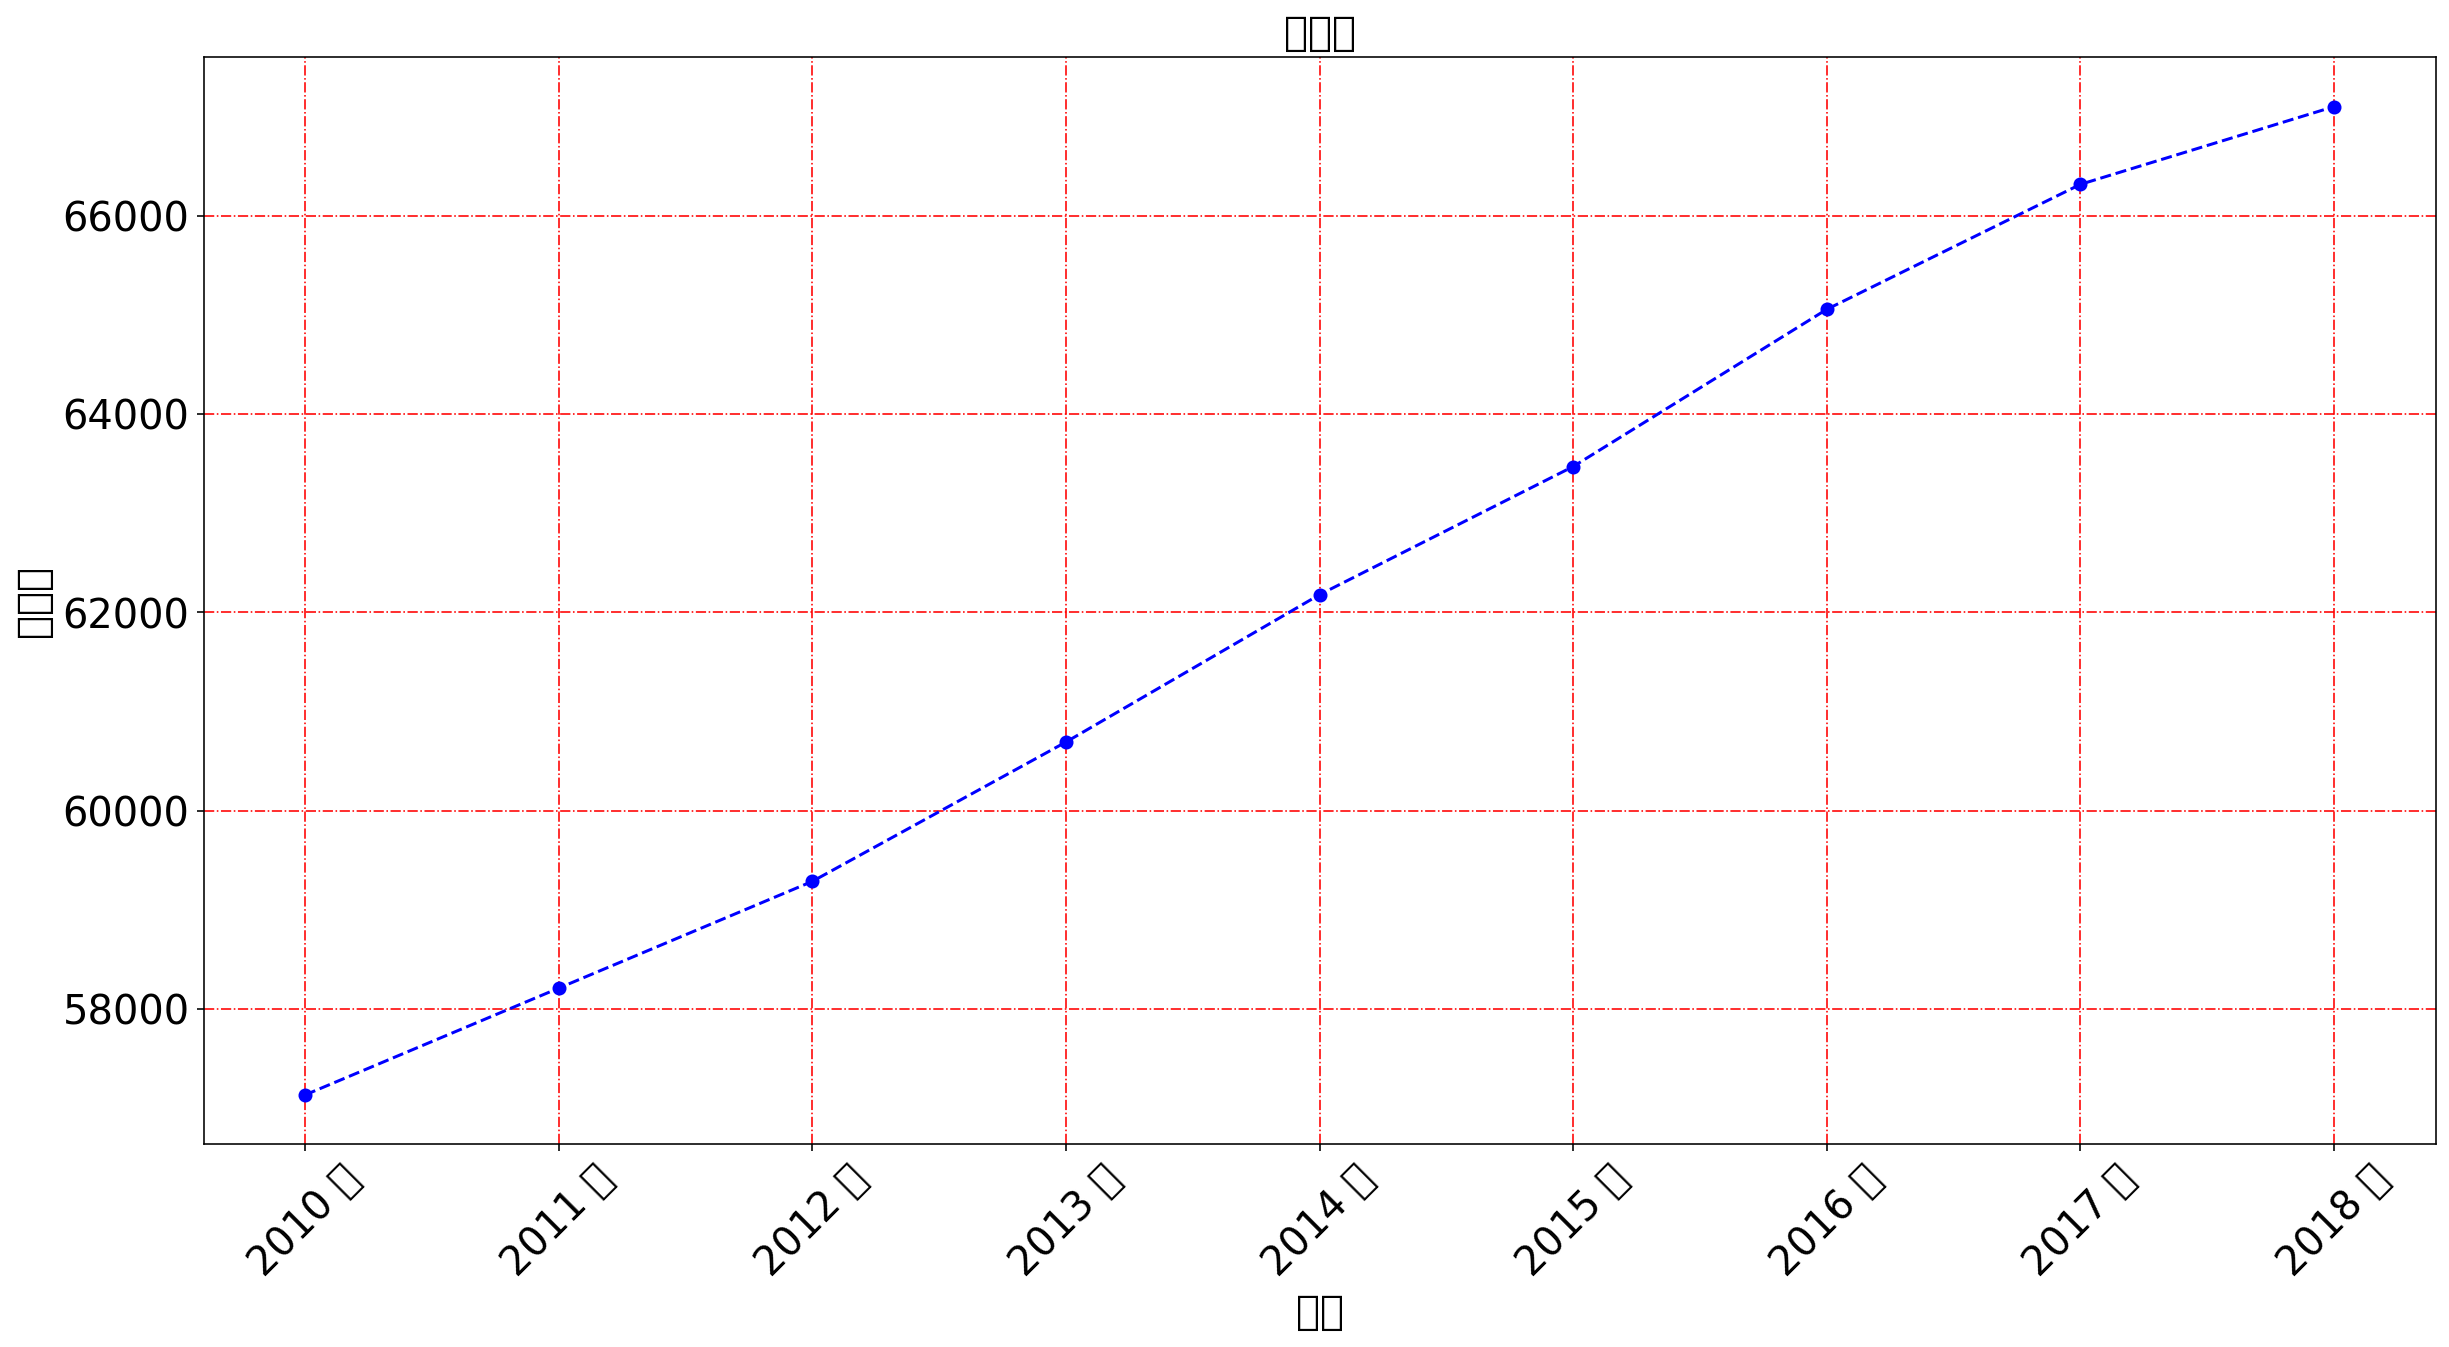

In [19]:
!pip install openpyxl

plt.style.available
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False   


print(df)

df_i = df.iloc[1:3,1:]
print(df_i)

df_i2 = df_i.iloc[0, 4:]
df_i2
print(df_i2)

df_i2.plot(kind='line', stacked=False, alpha=1.0, figsize=(20,10),
                                marker = 'o', linestyle='--', color='blue')

plt.grid(True, axis='x', color='red', linestyle='-.')
plt.grid(True, axis='y', color='red', linestyle='-.')
plt.title("병원수", size=20)
plt.ylabel('병원수', size=20)
plt.xlabel('연도', size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation = 45)
# plt.ylim(98, 103)